#### Import block

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

%matplotlib inline

In [2]:
# Check for available GPU.
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### Function definitions

In [3]:
# Loader functions
# Inspiration: https://towardsdatascience.com/writing-custom-keras-generators-fe815d992c5a

def get_input(path):
    # Load array.
    t_input = np.load(path)
    # Pad to even number of pixels
    t_input = np.pad(t_input, [(0,0),(0,1),(0,1)])
    # Resize to include a channel dimension.
    t_input = tf.expand_dims(t_input, axis = -1)
    return t_input

def get_output(path):
    # Load array.
    t_output = np.load(path)
    # Pad to even number of pixels
    t_output = np.pad(t_output, [(0,0),(0,1),(0,1)])
    # Resize to include a channel dimension.
    t_output = tf.expand_dims(t_output, axis = -1)
    return t_output

def data_generator(samples, batch_size = 64):
    
    while True:
        # Select files (paths/indices) for the batch
        batch_samples  = np.random.choice(a = samples.index, 
                                      size = batch_size)
        batch_input  = []
        batch_output = [] 

        # Read in each input, perform preprocessing and get labels
        for sample in batch_samples:
          input = get_input(samples.loc[sample].features)
          output = get_output(samples.loc[sample].labels)

          batch_input += [input]
          batch_output += [output]
        # Return a tuple of (input, output) to feed the network
        batch_x = np.array(batch_input)
        batch_y = np.array(batch_output)
        
        yield(batch_x, batch_y)


In [4]:
m = pd.read_csv('Sample_Dataset/train/meta.csv')
m

,Unnamed: 0,Lon,Lat,Date,features,labels
0,356962,-53.345535,-6.535028,2017-07-30,Sample_Dataset/train/features/356962.npy,Sample_Dataset/train/labels/356962.npy
1,546517,-47.329685,-8.260676,2017-08-20,Sample_Dataset/train/features/546517.npy,Sample_Dataset/train/labels/546517.npy
2,799359,-50.967861,-8.255809,2017-09-04,Sample_Dataset/train/features/799359.npy,Sample_Dataset/train/labels/799359.npy
3,714590,-66.144379,-12.624272,2017-08-31,Sample_Dataset/train/features/714590.npy,Sample_Dataset/train/labels/714590.npy
4,240012,-48.350338,-11.838207,2017-07-14,Sample_Dataset/train/features/240012.npy,Sample_Dataset/train/labels/240012.npy
...,...,...,...,...,...,...
6491,173827,-54.326607,-11.983384,2017-06-20,Sample_Dataset/train/features/173827.npy,Sample_Dataset/train/labels/173827.npy
6492,1377764,-47.425915,-7.486426,2017-09-26,Sample_Dataset/train/features/1377764.npy,Sample_Dataset/train/labels/1377764.npy
6493,1444041,-65.172768,-10.714162,2017-10-02,Sample_Dataset/train/features/1444041.npy,Sample_Dataset/train/labels/1444041.npy
6494,644793,-53.701656,-15.977278,2017-08-27,Sample_Dataset/train/features/644793.npy,Sample_Dataset/train/labels/644793.npy


#### Load data

In [5]:
# Get data from one chip
sample_input = np.load('Sample_Dataset/train/features/3243.npy')

# Pad to even number of pixels
a = np.pad(sample_input, [(0,0),(0,1),(0,1)])
# Resize to include a channel dimension.
a = tf.expand_dims(a, axis = -1)
# Resize to include a batch dimension.
a = tf.expand_dims(a, axis = 0)
# Display shape for verification.
a.shape

TensorShape([1, 4, 32, 32, 1])

#### Experiment with basic model structure

In [6]:
b = tf.keras.layers.Conv3D(32, (3,3,3), padding = 'same', activation='relu', bias_initializer=Constant(0.01), 
                           input_shape=(a))(a)
b.shape

TensorShape([1, 4, 32, 32, 32])

In [7]:
c = tf.keras.layers.Conv3D(32, (3,3,3), padding = 'same', activation='relu', bias_initializer=Constant(0.01) 
                           )(b)
c.shape

TensorShape([1, 4, 32, 32, 32])

In [8]:
d = layers.MaxPooling3D((2,2,2))(c)
d.shape

TensorShape([1, 2, 16, 16, 32])

In [9]:
e = tf.keras.layers.Conv3D(64, (2,2,2), padding = 'same', activation='relu')(d)
e.shape

TensorShape([1, 2, 16, 16, 64])

In [10]:
f = tf.keras.layers.Conv3D(64, (2,2,2), padding = 'same', activation='relu')(e)
f.shape

TensorShape([1, 2, 16, 16, 64])

In [11]:
g = layers.MaxPooling3D((1,2,2))(f)
g.shape

TensorShape([1, 2, 8, 8, 64])

In [12]:
h = tf.keras.layers.Conv3D(128, (2,2,2), padding = 'same', activation='relu')(g)
h.shape

TensorShape([1, 2, 8, 8, 128])

In [13]:
i = tf.keras.layers.Conv3D(128, (2,2,2), padding = 'same', activation='relu')(h)
i.shape

TensorShape([1, 2, 8, 8, 128])

In [14]:
j = layers.MaxPooling3D((1,2,2))(i)
j.shape

TensorShape([1, 2, 4, 4, 128])

In [15]:
k = tf.keras.layers.Conv3D(256, (2,2,2), padding = 'same', activation='relu')(j)
k.shape

TensorShape([1, 2, 4, 4, 256])

In [16]:
l = tf.keras.layers.Conv3D(256, (2,2,2), padding = 'same', activation='relu')(k)
l.shape

TensorShape([1, 2, 4, 4, 256])

In [17]:
m = layers.MaxPooling3D((2,4,4))(l)
m.shape

TensorShape([1, 1, 1, 1, 256])

In [18]:
t = layers.Conv3DTranspose(256, (2,2,2), (2,4,4), padding = 'same', activation='relu')(m)
t = layers.concatenate([t, l])
t.shape

TensorShape([1, 2, 4, 4, 512])

In [19]:
u = tf.keras.layers.Conv3D(256, (2,2,2), padding = 'same', activation='relu')(t)
u.shape

TensorShape([1, 2, 4, 4, 256])

In [20]:
v = tf.keras.layers.Conv3D(256, (2,2,2), padding = 'same', activation='relu')(u)
v.shape

TensorShape([1, 2, 4, 4, 256])

In [21]:
w = layers.Conv3DTranspose(128, (2,2,2), (1,2,2), padding = 'same', activation='relu')(v)
w = layers.concatenate([w, i])
w.shape

TensorShape([1, 2, 8, 8, 256])

In [22]:
x = tf.keras.layers.Conv3D(128, (2,2,2), padding = 'same', activation='relu')(w)
x.shape

TensorShape([1, 2, 8, 8, 128])

In [23]:
y = tf.keras.layers.Conv3D(128, (2,2,2), padding = 'same', activation='relu')(x)
y.shape

TensorShape([1, 2, 8, 8, 128])

In [24]:
z = layers.Conv3DTranspose(64, (2,2,2), (1,2,2), padding = 'same', activation='relu')(y)
z = layers.concatenate([z, f])
z.shape

TensorShape([1, 2, 16, 16, 128])

In [25]:
aa = tf.keras.layers.Conv3D(64, (2,2,2), padding = 'same', activation='relu')(z)
aa.shape

TensorShape([1, 2, 16, 16, 64])

In [26]:
ab = tf.keras.layers.Conv3D(64, (2,2,2), padding = 'same', activation='relu')(aa)
ab.shape

TensorShape([1, 2, 16, 16, 64])

In [27]:
ai = layers.Conv3DTranspose(32, (2,2,2), (1,2,2), padding = 'same', activation='relu')(ab)
ag = layers.MaxPooling3D((2,1,1))(c)
ai = layers.concatenate([ai, ag])
ai.shape

TensorShape([1, 2, 32, 32, 64])

In [28]:
ak = layers.Conv2D(1, 1, padding='same', activation = 'sigmoid')(ai)
ak.shape

TensorShape([1, 2, 32, 32, 1])

#### Model assembly

In [29]:
inputs = layers.Input(shape=((4,32,32,1)))
b = tf.keras.layers.Conv3D(32, (3,3,3), padding = 'same', activation='relu', bias_initializer=Constant(0.01))(inputs)
c = tf.keras.layers.Conv3D(32, (3,3,3), padding = 'same', activation='relu', bias_initializer=Constant(0.01))(b)
d = layers.MaxPooling3D((2,2,2))(c)
d = layers.Dropout(0.3)(d)
e = tf.keras.layers.Conv3D(64, (2,2,2), padding = 'same', activation='relu')(d)
f = tf.keras.layers.Conv3D(64, (2,2,2), padding = 'same', activation='relu')(e)
g = layers.MaxPooling3D((1,2,2))(f)
g = layers.Dropout(0.3)(g)
h = tf.keras.layers.Conv3D(128, (2,2,2), padding = 'same', activation='relu')(g)
i = tf.keras.layers.Conv3D(128, (2,2,2), padding = 'same', activation='relu')(h)
j = layers.MaxPooling3D((1,2,2))(i)
j = layers.Dropout(0.3)(j)
k = tf.keras.layers.Conv3D(256, (2,2,2), padding = 'same', activation='relu')(j)
l = tf.keras.layers.Conv3D(256, (2,2,2), padding = 'same', activation='relu')(k)
m = layers.MaxPooling3D((2,4,4))(l)
m = layers.Dropout(0.3)(m)
t = layers.Conv3DTranspose(256, (2,2,2), (2,4,4), padding = 'same', activation='relu')(m)
t = layers.concatenate([t, l])
t = layers.Dropout(0.3)(t)
u = tf.keras.layers.Conv3D(256, (2,2,2), padding = 'same', activation='relu')(t)
v = tf.keras.layers.Conv3D(256, (2,2,2), padding = 'same', activation='relu')(u)
w = layers.Conv3DTranspose(128, (2,2,2), (1,2,2), padding = 'same', activation='relu')(v)
w = layers.concatenate([w, i])
w = layers.Dropout(0.3)(w)
x = tf.keras.layers.Conv3D(128, (2,2,2), padding = 'same', activation='relu')(w)
y = tf.keras.layers.Conv3D(128, (2,2,2), padding = 'same', activation='relu')(x)
z = layers.Conv3DTranspose(64, (2,2,2), (1,2,2), padding = 'same', activation='relu')(y)
z = layers.concatenate([z, f])
z = layers.Dropout(0.3)(z)
aa = tf.keras.layers.Conv3D(64, (2,2,2), padding = 'same', activation='relu')(z)
ab = tf.keras.layers.Conv3D(64, (2,2,2), padding = 'same', activation='relu')(aa)
ai = layers.Conv3DTranspose(32, (2,2,2), (1,2,2), padding = 'same', activation='relu')(ab)
ag = layers.MaxPooling3D((2,1,1))(c)
ai = layers.concatenate([ai, ag])
outputs = layers.Conv2D(1, 1, padding='same', activation = 'sigmoid')(ai)

In [30]:
forecast_model = tf.keras.Model(inputs, outputs, name="3D_UNet")

In [31]:
# Verify output shape.
forecast_model.predict(a).shape

1/1 [==============================] - 0s 182ms/step


(1, 2, 32, 32, 1)

In [32]:
# Display model details.
forecast_model.summary()

Model: "3D_UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 32, 32,   0           []                               
                                1)]                                                               
                                                                                                  
 conv3d_14 (Conv3D)             (None, 4, 32, 32, 3  896         ['input_1[0][0]']                
                                2)                                                                
                                                                                                  
 conv3d_15 (Conv3D)             (None, 4, 32, 32, 3  27680       ['conv3d_14[0][0]']              
                                2)                                                          

 spose)                         4)                                                                
                                                                                                  
 concatenate_6 (Concatenate)    (None, 2, 16, 16, 1  0           ['conv3d_transpose_6[0][0]',     
                                28)                               'conv3d_17[0][0]']              
                                                                                                  
 dropout_6 (Dropout)            (None, 2, 16, 16, 1  0           ['concatenate_6[0][0]']          
                                28)                                                               
                                                                                                  
 conv3d_26 (Conv3D)             (None, 2, 16, 16, 6  65600       ['dropout_6[0][0]']              
                                4)                                                                
          

In [33]:
# Compile model.
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
forecast_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [34]:
# Data loaders.
batch_size = 64
meta_t = pd.read_csv('Sample_Dataset/train/meta.csv')
meta_v = pd.read_csv('Sample_Dataset/val/meta.csv')
t_gen = data_generator(meta_t, batch_size = batch_size)
v_gen = data_generator(meta_v, batch_size = batch_size)

In [35]:
# Train model.
forecast_model.fit(t_gen, 
                   epochs = 50, 
                   verbose = 1, 
                   validation_data = v_gen, 
                   steps_per_epoch = len(meta_t) // batch_size,
                   validation_steps = len(meta_v) // batch_size,
                  )

Epoch 1/50
101/101 [==============================] - 14s 133ms/step - loss: 0.6835 - accuracy: 0.9100 - val_loss: 0.6731 - val_accuracy: 0.9970
Epoch 2/50
101/101 [==============================] - 13s 132ms/step - loss: 0.6591 - accuracy: 0.9957 - val_loss: 0.6401 - val_accuracy: 0.9971
Epoch 3/50
101/101 [==============================] - 13s 133ms/step - loss: 0.4425 - accuracy: 0.9958 - val_loss: 0.1918 - val_accuracy: 0.9972
Epoch 4/50
101/101 [==============================] - 13s 132ms/step - loss: 0.1692 - accuracy: 0.9956 - val_loss: 0.1095 - val_accuracy: 0.9972
Epoch 5/50
101/101 [==============================] - 13s 133ms/step - loss: 0.0829 - accuracy: 0.9958 - val_loss: 0.0474 - val_accuracy: 0.9971
Epoch 6/50
101/101 [==============================] - 13s 133ms/step - loss: 0.0421 - accuracy: 0.9960 - val_loss: 0.0324 - val_accuracy: 0.9972
Epoch 7/50
101/101 [==============================] - 13s 133ms/step - loss: 0.0373 - accuracy: 0.9958 - val_loss: 0.0327 - val_ac

In [36]:
# Save trained model.
forecast_model.save('Models/003')

INFO:tensorflow:Assets written to: Models/003\assets


INFO:tensorflow:Assets written to: Models/003\assets


#### Examine how model is working

In [37]:
# Get data from one chip
sample_input = np.load('Sample_Dataset/val/features/2718135.npy')

# Pad to even number of pixels
a = np.pad(sample_input, [(0,0),(0,1),(0,1)])
# Resize to include a channel dimension.
a = tf.expand_dims(a, axis = -1)
# Resize to include a batch dimension.
a = tf.expand_dims(a, axis = 0)

# Get data from one chip
sample_output = np.load('Sample_Dataset/val/labels/2642208.npy')

# Pad to even number of pixels
b = np.pad(sample_output, [(0,0),(0,1),(0,1)])
# Resize to include a channel dimension.
b = tf.expand_dims(b, axis = -1)
# Resize to include a batch dimension.
b = tf.expand_dims(b, axis = 0)

In [38]:
pred_eval = forecast_model.predict(a)
pred_eval.shape

1/1 [==============================] - 0s 162ms/step


(1, 2, 32, 32, 1)

In [39]:
pred_eval.sum()

17.087906

In [40]:
b.shape

TensorShape([1, 2, 32, 32, 1])

In [41]:
b.numpy().sum()

8

In [42]:
pred_eval[0][0][0]

array([[0.00695483],
       [0.00637802],
       [0.00723146],
       [0.00712932],
       [0.00731858],
       [0.00686454],
       [0.00774175],
       [0.00767069],
       [0.00770126],
       [0.00720771],
       [0.00801149],
       [0.00785888],
       [0.00796433],
       [0.00754437],
       [0.00874157],
       [0.00874281],
       [0.00890333],
       [0.0083473 ],
       [0.0087347 ],
       [0.00867721],
       [0.00806763],
       [0.00763143],
       [0.00774375],
       [0.00691641],
       [0.00671686],
       [0.00626129],
       [0.00569441],
       [0.0056796 ],
       [0.00546665],
       [0.00490744],
       [0.00028966],
       [0.00015849]], dtype=float32)

In [43]:
# Convert predictions to binary.
(pred_eval >= 0.05).astype(int).sum()

0

In [44]:
pred_eval.max()

0.048403706

In [45]:
#viz_real = pred_eval[0][0].reshape((32,32))
viz_real = b[0][0].numpy().reshape((32,32))
viz_real.shape
viz_real.sum()

3

In [46]:
viz_pred = pred_eval[0][0].reshape((32,32))
viz_pred.shape

(32, 32)

In [47]:
viz_feature = a[0][3].numpy().reshape((32,32))
viz_feature.shape

(32, 32)

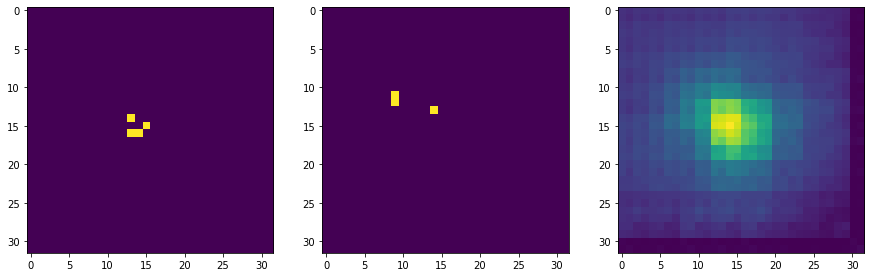

In [58]:
# Visualize
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 15))
ax1.imshow(viz_feature)
ax2.imshow(viz_real)
ax3.imshow(viz_pred)